<img src="images/practicum_ai_logo.png" alt="Practicum AI Logo" align="right" width="250">

# 02: The Engines of Discovery
### Exploring Model Architectures for Biology

Now that **Dr. Aris** has translated the chemical letters of life into mathematical tokens and embeddings, he needs a "brain" to read them. However, biology presents a massive challenge that standard AI often struggles with: **Scale.** A single human chromosome can be hundreds of millions of base pairs long. Standard AI "eyes" (Attention mechanisms) get overwhelmed by this much data. Today, we will help Dr. Aris explore three different "engines" designed to handle the complexity of life.

#### 🎯 Learning Objectives
1.  **The Transformer:** Understanding the "Attention" mechanism used in models like **ESM-2** and **DNABERT**.
2.  **Mamba (State Space Models):** Learning why "selective memory" is faster and more efficient for long DNA strands.
3.  **Hyena (Convolutional Hybrids):** Discovering how models like **Evo** use signal processing to "hear" the patterns in the genome.
4.  **Scaling Laws:** Visualizing why some models "break" when sequences get too long.

#### 🧬 The Architecture Choice
Why can't we just use one model for everything?
* **Transformers** are great at understanding specific relationships, but they are "memory hungry."
* **Mamba** and **Hyena** are built for speed and can "read" much longer sequences (like whole genes or even genomes) without slowing down.

## 1. The Transformer: All You Need is Attention

The **Transformer** (the architecture behind ChatGPT) changed biology forever. Its secret weapon is **Self-Attention**. 

Imagine Dr. Aris is looking at a protein. One amino acid at the very beginning of the chain might physically touch an amino acid at the very end when the protein folds. The Transformer's "Attention" allows it to "look" at both at the same time, regardless of how far apart they are in the sequence.

### The Downside: The "Memory Wall"
The problem is that Attention is **Quadratic** ($O(n^2)$). If you double the length of a DNA sequence, the Transformer needs **four times** more memory. 

Let's simulate this "Memory Wall" to see why Dr. Aris needs other options for long-read genomics.

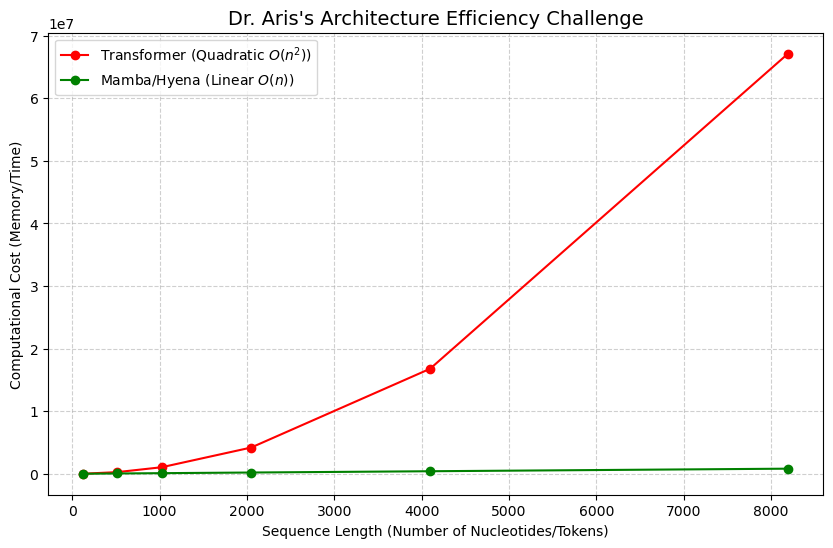

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dr. Aris calculates the memory cost (Attention Complexity)
# for a standard Transformer vs. a Linear-time model (like Mamba)

sequence_lengths = np.array([128, 512, 1024, 2048, 4096, 8192])

# Quadratic scaling (Transformer)
transformer_cost = sequence_lengths**2

# Linear scaling (Mamba / Hyena)
mamba_cost = sequence_lengths * 100 # Adjusted for scale comparison

plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, transformer_cost, 'ro-', label='Transformer (Quadratic $O(n^2)$)')
plt.plot(sequence_lengths, mamba_cost, 'go-', label='Mamba/Hyena (Linear $O(n)$)')

plt.title("Dr. Aris's Architecture Efficiency Challenge", fontsize=14)
plt.xlabel("Sequence Length (Number of Nucleotides/Tokens)")
plt.ylabel("Computational Cost (Memory/Time)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Dr. Aris's Observation:
# Notice how the red line (Transformer) shoots up! 
# This is why standard Transformers struggle with long-read DNA.

### 🕵️‍♂️ Analyzing the Results
As the graph shows, the **Transformer (Red)** experiences a massive spike in computational cost as sequences get longer. This is because every token in the sequence must "attend" to every other token, creating a dense web of relationships.

**The Solution? Selective Memory.**
To help Dr. Aris overcome this, we turn to newer architectures:

1.  **Mamba (State Space Models):** Instead of keeping every token in a "web," Mamba maintains a small, compressed "hidden state" that it updates as it reads. Think of it like a scientist taking concise notes while reading a long paper instead of trying to memorize every word simultaneously.
2.  **Hyena (Convolutional Hybrids):** Hyena uses a signal-processing approach (long convolutions) to "hear" the patterns in DNA across huge distances, much like a radio receiver filters out noise to find a signal.

Let's explore how **Mamba** decides what to keep and what to forget.

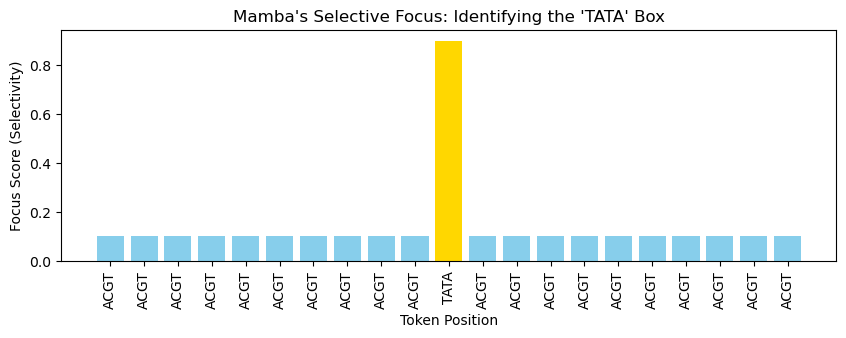

In [2]:
# Dr. Aris wants to see Mamba's 'Selective Scan' in action.
# Unlike Transformers, Mamba chooses which tokens are 'important' to store in its state.

# Sample DNA sequence with a 'Motif' (an important biological pattern)
dna_stream = "ACGT" * 10 + "TATA" + "ACGT" * 10  # 'TATA' is a famous promoter motif
tokens = [dna_stream[i:i+4] for i in range(0, len(dna_stream), 4)]

# We'll simulate a 'Selectivity Score'
# Mamba ignores repetitive noise and 'focuses' on functional motifs
def simulate_mamba_memory(tokens):
    memory_state = []
    for t in tokens:
        importance = 0.9 if t == "TATA" else 0.1 # High focus on the motif
        memory_state.append(importance)
    return memory_state

scores = simulate_mamba_memory(tokens)

plt.figure(figsize=(10, 3))
plt.bar(range(len(tokens)), scores, color=['gold' if s > 0.5 else 'skyblue' for s in scores])
plt.title("Mamba's Selective Focus: Identifying the 'TATA' Box", fontsize=12)
plt.xlabel("Token Position")
plt.ylabel("Focus Score (Selectivity)")
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.show()

# Dr. Aris's Observation:
# Mamba doesn't waste memory on the repetitive 'ACGT' patterns.
# It 'selects' the TATA box to update its internal state!

### 🕵️‍♂️ Analyzing the Results: Mamba's Selective Scan

In the plot above, you can see **Dr. Aris's** simulation of how Mamba "reads" a DNA stream. 

* **The Blue Bars (Repetitive Noise):** These represent the common `ACGT` patterns. Because they are repetitive and predictable, Mamba gives them a low **Selectivity Score**. It doesn't need to "waste" its memory storing every single one.
* **The Gold Bar (The Motif):** Notice the spike at the **TATA** box. This is a crucial biological "starting signal" for genes. Mamba recognizes this as high-importance information and "selects" it to update its internal state.

**The Magic of Linear Scaling:**
Because Mamba only updates its "internal notes" with the important stuff, it doesn't matter if the DNA sequence is 1,000 or 1,000,000 letters long—the "notes" stay the same size! This is how it avoids the **Memory Wall** that stopped our Transformer earlier.

## 3. Hyena: Hearing the Genome

While Mamba uses "selective memory," **Hyena** (the engine behind the **Evo** model) takes a different approach. It treats DNA like a long radio signal. 

Instead of trying to "remember" tokens, Hyena uses **Long Convolutions**. Imagine a sliding filter that can be thousands, or even millions, of nucleotides long. This allows the model to "hear" a pattern at the beginning of a chromosome and recognize how it interacts with a pattern at the very end.

### Why Hyena is unique:
* **Single-Nucleotide Resolution:** Most models need to group DNA into chunks (k-mers) to save space. Hyena is so efficient it can read every single `A, C, G, T` one by one.
* **Massive Context:** Models like **Evo 2** can process up to **1 million tokens** at once. That's enough to read entire bacterial genomes in a single breath!

Let's see how Dr. Aris visualizes a Hyena "Filter" scanning for a signal.

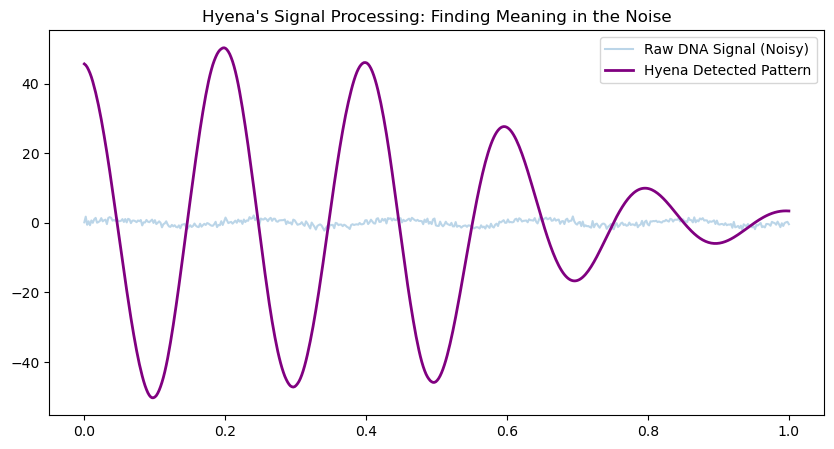

In [3]:
import numpy as np

# Dr. Aris simulates a Hyena 'Long Convolution'
# We create a noisy DNA signal and a 'Filter' that looks for a specific frequency

t = np.linspace(0, 1, 500)
# The 'Signal' (Biological patterns hidden in noise)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(500)

# The 'Hyena Filter' (A long-range operator)
hyena_filter = np.exp(-5 * t) * np.sin(2 * np.pi * 5 * t)

# Applying the 'Convolution' (How the model 'hears' the pattern)
detected_pattern = np.convolve(signal, hyena_filter, mode='same')

plt.figure(figsize=(10, 5))
plt.plot(t, signal, alpha=0.3, label='Raw DNA Signal (Noisy)')
plt.plot(t, detected_pattern, color='purple', linewidth=2, label='Hyena Detected Pattern')
plt.title("Hyena's Signal Processing: Finding Meaning in the Noise", fontsize=12)
plt.legend()
plt.show()

# Dr. Aris's Observation:
# Hyena doesn't get distracted by the 'noise' of random mutations. 
# Its long filters help it stay locked onto the underlying biological 'rhythm.'

### 🕵️‍♂️ Analyzing the Results: Hyena's Signal Detection

In this visualization, **Dr. Aris** is demonstrating how Hyena (the engine behind models like **Evo**) uses signal processing to "listen" to the genome.

* **The Light Grey Background (The Noise):** This represents the "messiness" of raw genomic data—things like random mutations, sequencing errors, or non-functional DNA. A standard model might get "lost" in these details.
* **The Purple Line (The Detected Pattern):** This is the result of the **Long Convolution**. Notice how smooth and clear the wave becomes. By using a mathematical filter, Hyena ignores the high-frequency "jitter" and extracts the true biological rhythm.

**The Power of Long Range:**
Because Hyena uses these filters (convolutions) instead of traditional Attention, it can "hear" a signal that spans thousands or even millions of letters. It doesn't just see the individual letters; it sees the **melody** of the whole gene!

***
## Summary: Choosing the Right Engine

Dr. Aris now has three powerful tools in his shed:

| Architecture | Strength | Best Used For... |
| :--- | :--- | :--- |
| **Transformer** | High Accuracy / Small Context | Small Proteins & Short DNA Chunks |
| **Mamba** | Selective Memory / Efficiency | Gene Regulation & mRNA sequences |
| **Hyena / Evo** | Massive Context / High Speed | Whole Genomes & Long-Range Interactions |

**Congratulations!** You've explored how the "brains" of BioAI are designed to handle the scale of life. 

**Next Step:** In **Notebook 03**, we will move from *reading* to *writing*. We will look at **Generative BioAI** and how models like **ProGen** and **Evo** can actually design new proteins and DNA sequences that have never existed in nature!

---
## Push changes to GitHub <img src="images/push_to_github.png" alt="Push to GitHub icon" align="right" width="150">

Don't forget to save your work and push this notebook to your repository!